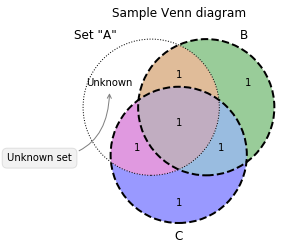

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

In [ ]:
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()

In [ ]:
# DEMO: Zoom-Window
import numpy as np

from bokeh.layouts import row
from bokeh.models import ColumnDataSource, CustomJS, Rect
from bokeh.plotting import output_notebook, figure, show

output_file('range_update_callback.html')

N = 4000

x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

source = ColumnDataSource({'x': [], 'y': [], 'width': [], 'height': []})

jscode="""
    var data = source.data;
    var start = cb_obj.start;
    var end = cb_obj.end;
    data['%s'] = [start + (end - start) / 2];
    data['%s'] = [end - start];
    source.change.emit();
"""

p1 = figure(title='Pan and Zoom Here', x_range=(0, 100), y_range=(0, 100),
            tools='box_zoom,wheel_zoom,pan,reset', plot_width=400, plot_height=400)
p1.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

p1.x_range.callback = CustomJS(
        args=dict(source=source), code=jscode % ('x', 'width'))
p1.y_range.callback = CustomJS(
        args=dict(source=source), code=jscode % ('y', 'height'))

p2 = figure(title='See Zoom Window Here', x_range=(0, 100), y_range=(0, 100),
            tools='', plot_width=400, plot_height=400)
p2.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
rect = Rect(x='x', y='y', width='width', height='height', fill_alpha=0.1,
            line_color='black', fill_color='black')
p2.add_glyph(source, rect)

layout = row(p1, p2)

show(layout)

### Godness of Fit
Goodness of Fit using **Kolmogorov-Smirnov** (alternatives are **chi square** and **maximum likelihood**) 

https://stats.stackexchange.com/questions/113464/understanding-scipy-kolmogorov-smirnov-test
*"For the KS test the p-value is itself distributed uniformly in [0,1] if the H0 is true (which it is if you test whether it your sample is from U(0,1)U(0,1) and the random number generation works okay). It therefore must "vary wildly" between 0 and 1, in fact its standard deviation is 1/12−−√1/12 which is roughly 0.3."*

https://en.m.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test
*"The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In each case, the distributions considered under the null hypothesis are continuous distributions but are otherwise unrestricted....The Kolmogorov–Smirnov test can be modified to serve as a goodness of fit test. "* 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

scipy.stats.wasserstein_distance

In [ ]:
# https://stats.stackexchange.com/questions/113464/understanding-scipy-kolmogorov-smirnov-test

import numpy as np
import scipy
a = np.random.uniform(size=4999)

print(scipy.stats.kstest(a, 'uniform'))

rvs = df.loc[(df.document_id==0)]['weight']

scipy.stats.kstest(rvs,'uniform')
stats.kstest([1,2,3,4,5,6], 'uniform')


### Topic Clustering
Compute topic clustering based on the distances between the T-SNE 2D coordinates. The SciPy linkage() takes an n x m matrice i.e. n points in m-dimensional vector space (can also take a 1D condensed distance matrix).

1. The first plot takes the num_topics x 2 matrix that T-SNE produced as input
2. The second example takes the "raw" vectorized num_topics x num_words matrix  as input i.e same input as to T-SNE


In [3]:
# DEPRECATED
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute hierarchical/agglomerative clustering.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# https://stackoverflow.com/questions/11917779/how-to-plot-and-annotate-hierarchical-clustering-dendrograms-in-scipy-matplotlib

if False:
    C = linkage(X_reduced, method='single', metric='euclidean', optimal_ordering=False)
else:
    n_words = 50
    X_n_space, _ = ModelUtility.compute_topic_terms_vector_space(state.get_lda(), n_words)
    C = linkage(X_n_space.toarray(), method='single', metric='euclidean', optimal_ordering=False)
    
plt.figure(figsize=(24,12))
R = dendrogram(C, orientation='left')
plt.show()
plt.close()


NameError: name 'ModelUtility' is not defined

In [ ]:
# Code
import pandas as pd
from bokeh.layouts import row
category_size = 100

topic_weights = state.get_document_topic_weights()[['document_id', 'topic_id', 'weight']]

sd = topic_weights.weight.apply(lambda x: int(category_size * x))
s_count = len(topic_weights)

sd = sd[sd>0]
v_count = len(sd)
x_count = s_count - v_count
d_count = len(topic_weights.document_id.unique())
t_count = len(topic_weights.topic_id.unique())

print('The data consists of {} documents, {} topics giving {} topic shares'.format(d_count, t_count, s_count))
print('As much as {0:.2f}% of the documents topic shares are 0 ({1} out of {2})'.format(
    100*x_count/s_count,x_count,s_count))
print("The following graphs show the distribution of topic shares in absolute number and percentages")

ys = sd[sd>0].groupby(sd).size()
xs = ys.index
ysp = ys.apply(lambda x: x/v_count)

p1 = figure(width=400, height=400, tools='',
    x_axis_label='Number of topic shares',
    y_axis_label='Percentage of all topics having that share')

cd = p1.vbar(x=xs,width=1,top=ys,line_width=2)
            
p2 = figure(width=400, height=400, tools='',
    x_axis_label='Topic''s share in document (percentage)',
    y_axis_label='Percentage of all topics having that share')

cd = p2.line(x=xs, y=ysp, line_width=2)
show(row(p1,p2))


### Grubbs Outlier Test

In [ ]:
# Grubs Test
import numpy as np
from scipy.stats import t, zscore
 
 
def grubbs(X, test='two-tailed', alpha=0.05):
 
    '''
    Performs Grubbs' test for outliers recursively until the null hypothesis is
    true.
 
    Parameters
    ----------
    X : ndarray
        A numpy array to be tested for outliers.
    test : str
        Describes the types of outliers to look for. Can be 'min' (look for
        small outliers), 'max' (look for large outliers), or 'two-tailed' (look
        for both).
    alpha : float
        The significance level.
 
    Returns
    -------
    X : ndarray
        The original array with outliers removed.
    outliers : ndarray
        An array of outliers.
    '''
 
    Z = zscore(X, ddof=1)  # Z-score
    N = len(X)  # number of samples
 
    # calculate extreme index and the critical t value based on the test
    if test == 'two-tailed':
        extreme_ix = lambda Z: np.abs(Z).argmax()
        t_crit = lambda N: t.isf(alpha / (2.*N), N-2)
    elif test == 'max':
        extreme_ix = lambda Z: Z.argmax()
        t_crit = lambda N: t.isf(alpha / N, N-2)
    elif test == 'min':
        extreme_ix = lambda Z: Z.argmin()
        t_crit = lambda N: t.isf(alpha / N, N-2)
    else:
        raise ValueError("Test must be 'min', 'max', or 'two-tailed'")
 
    # compute the threshold
    thresh = lambda N: (N - 1.) / np.sqrt(N) * \
        np.sqrt(t_crit(N)**2 / (N - 2 + t_crit(N)**2))
 
    # create array to store outliers
    outliers = np.array([])
 
    # loop throught the array and remove any outliers
    while abs(Z[extreme_ix(Z)]) > thresh(N):
 
        # update the outliers
        outliers = np.r_[outliers, X[extreme_ix(Z)]]
        # remove outlier from array
        X = np.delete(X, extreme_ix(Z))
        # repeat Z score
        Z = zscore(X, ddof=1)
        N = len(X)
 
    return X, outliers

### Adjust Connector Arrow to Node Circumference

In [ ]:
# Code
'''
[x1, x2], {y1, y2}, R


y = k * x + m

R^2 = (y2 - y0)^2 +  (x2 - x0)^2


y1 = k * x1 + m
y2 = k * x2 + m

y2 = k * x2 + y1 - k * x1
y2 - y1 = k * x2 - k * x1 = k * (x2 - x1)
k = (y2 - y1) / (x2 - x1)
m = y1 - k * x1
'''
def adjust_connector_line(xs, ys,radius):
    x1, x2 = xs
    y1, y2 = ys
    dx, dy = x2 - x1, y2 - y1
    length = math.sqrt(dx * dx + dy * dy)
    if (length > 0):
        dx /= length
        dy /= length
    dx *= radius #length - radius
    dy *= radius #length - radius
    return [x1 + dx, x2 - dx], [y1 + dy, y2 - dy]

In [7]:
from bokeh.sampledata.glucose import data
from bokeh.sampledata.iris import flowers

from bokeh.io import show, output_file
from bokeh.layouts import layout
from bokeh.models import ColumnDataSource, Paragraph, HoverTool, Div
from bokeh.plotting import figure

output_file("words_and_plots.html")


def text():
    return Paragraph(text="""
        Bacon ipsum dolor amet hamburger brisket prosciutto, pork ball tip andouille
        sausage landjaeger filet mignon ribeye ground round. Jerky fatback cupim
        landjaeger meatball pork loin corned beef, frankfurter short ribs short loin
        bresaola capicola chuck kevin. Andouille biltong turkey, tail t-bone ribeye
        short loin tongue prosciutto kielbasa short ribs boudin. Swine beef ribs
        tri-tip filet mignon bresaola boudin beef meatball venison leberkas fatback
        strip steak landjaeger drumstick prosciutto.
        Bacon ipsum dolor amet hamburger brisket prosciutto, pork ball tip andouille
        sausage landjaeger filet mignon ribeye ground round. Jerky fatback cupim
        landjaeger meatball pork loin corned beef, frankfurter short ribs short loin
        bresaola capicola chuck kevin. Andouille biltong turkey, tail t-bone ribeye
        short loin tongue prosciutto kielbasa short ribs boudin. Swine beef ribs
        tri-tip filet mignon bresaola boudin beef meatball venison leberkas fatback
        strip steak landjaeger drumstick prosciutto.
        """)


def scatter():
    colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
    source = ColumnDataSource(flowers)
    source.data['colors'] = [colormap[x] for x in flowers['species']]
    s = figure(title = "Iris Morphology")
    s.xaxis.axis_label = 'Petal Length'
    s.yaxis.axis_label = 'Petal Width'
    s.circle("petal_length", "petal_width", color="colors", source=source,
             fill_alpha=0.2, size=10, legend="species")
    # Lets move the legend off-canvas!
    legend = s.legend[0]
    legend.border_line_color = None
    legend.orientation = 'horizontal'
    legend.location = 'center_left'
    s.above.append(legend)
    return s


def hover_plot():
    x = data.ix['2010-10-06'].index.to_series()
    y = data.ix['2010-10-06']['glucose']
    p = figure(
        plot_width=800, plot_height=400, x_axis_type="datetime",
        tools="", toolbar_location=None, title='Hover over points'
    )
    p.line(x, y, line_dash="4 4", line_width=1, color='gray')
    cr = p.circle(
        x, y, size=20, fill_color="grey", alpha=0.1, line_color=None,
        hover_fill_color="firebrick", hover_alpha=0.5, hover_line_color=None
    )
    p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))
    return p

def intro():
    return Div(text="""
        <h3>Welcome to Layout!</h3>
        <p>Hopefully you'll see from the code, that the layout tries to get out of your way
        and do the right thing. Of course, it might not always, so please report bugs as you
        find them and attach them to the epic we're creating <a href="">here</a>.</p>
        <p>This is an example of <code>scale_width</code> mode (happy to continue the conversations
        about what to name the modes). In <code>scale_width</code> everything responds to the width
        that's available to it. Plots alter their height to maintain their aspect ratio, and widgets
        are allowed to grow as tall as they need to accomodate themselves. Often times widgets
        stay the same height, but text is a good example of a widget that doesn't.</p>
        <h4>I want to stress that this was all written in python. There is no templating or
        use of <code>bokeh.embed</code>.</h4>
    """)


l = layout(
    [
        [intro()],
        [text(), scatter()],
        [text()],
        [hover_plot(), text()],
    ],
    sizing_mode='scale_width'
)

show(l)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: colors [renderer: GlyphRenderer(id='6249fe64-39b4-456e-ba7f-efbcc929d627', ...)]


E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: colors [renderer: GlyphRenderer(id='6249fe64-39b4-456e-ba7f-efbcc929d627', ...)]
